# Assignment 1 (CSC3160/AIR6063)

This is an instruction and template for the first assignment. In this assignment, you will learn how to use tools to extract speech representations.

Should you have any inquiries, please feel free to reach out to the teaching team.

Please follow the template to finish your assignment and submit in GitHub.

## Example: Extracting spectrogram

In [5]:
!pip install torch>=1.2.0     #install torch
!pip install torchaudio       #install torchaudio
#sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

!pip install librosa          #install librosa


zsh:1: 1.2.0 not found


Shape of waveform: torch.Size([1, 139421])
Sample rate of waveform: 22050
Shape of resampled_waveform: torch.Size([1, 101168])


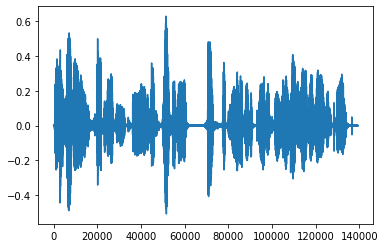

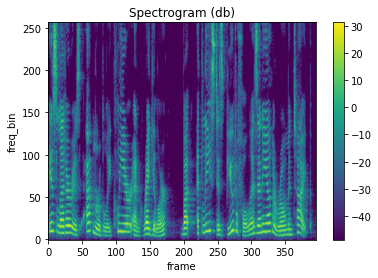

In [10]:
import requests
import torchaudio
import matplotlib.pyplot as plt
import torchaudio.functional as F
import torchaudio.transforms as T
import librosa

target_sample_rate = 16000
n_fft = 512

# a function to plot spectrogram
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

# url to find the audio sample
url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
# request the url
r = requests.get(url)

# filename, where to save the audio
filename = "LJ001-0048.wav"
with open(filename, 'wb') as f:
    f.write(r.content)

# load audio sample to memory
waveform, sample_rate = torchaudio.load(filename)

# create an object that resamples a waveform
resampler = T.Resample(sample_rate, target_sample_rate, dtype=waveform.dtype)
# resample a waveform from its original sampling rate to the target sampling rate
resampled_waveform = resampler(waveform)

# create an object that extract power spectrogram
spec_trans = T.Spectrogram(n_fft=n_fft, power=2)

# extract spectrogram
spec = spec_trans(resampled_waveform)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

print("Shape of resampled_waveform: {}".format(resampled_waveform.size()))

plt.figure()
plt.plot(waveform.t().numpy())

plot_spectrogram(spec[0])


## (1) [20 marks] Extract mel-spectrogram

In this part, you need to extract power spectorgram (FFT 1024) with 5ms, 10ms, 15ms frameshift, with the same window size 30ms. The speech signal is at 16 kHz sampling rate.
* Visualize each of the power spectorgram (FFT 1024)
* Plot the spectrum of the 150th frame of the 512-dimensional spectrogram with 10 ms frameshift



<Figure size 432x288 with 0 Axes>

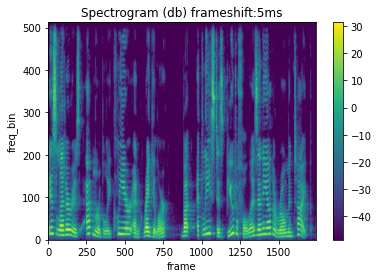

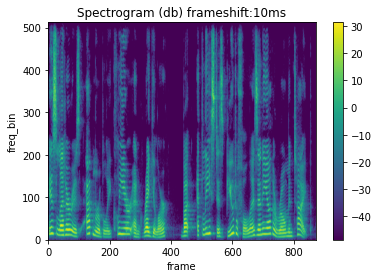

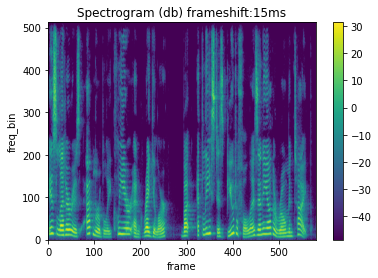

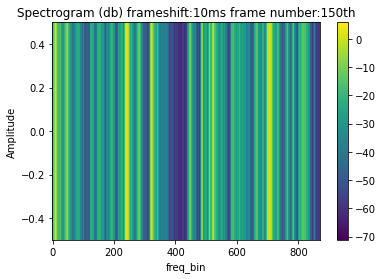

In [30]:
# Write your implementation here
import requests
import torchaudio
import matplotlib.pyplot as plt
import torchaudio.functional as F
import torchaudio.transforms as T
import librosa

target_sample_rate = 16000
n_fft = 1024

# url information of audio file
url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
# request and use the url
r = requests.get(url)

# list of frameshift time (5ms, 10ms, 15ms)
fr_shift_lst = [5, 10, 15]

# file to save the read r content
filename = "LJ001-0048.wav"
with open(filename, 'wb') as f:
    f.write(r.content)

# read the waveform and original sample rate
waveform, sample_rate = torchaudio.load(filename)

# generate the resample object
resampler = T.Resample(sample_rate, target_sample_rate, dtype = waveform.dtype)
# resample the origin waveform
resampled_waveform = resampler(waveform)

# calculate the value of parameters to be delivered into T.Specturm

# calculate hop length, its unit is the number of sample rate
hop_len_lst = [int(target_sample_rate * fr_shift / 1000) for fr_shift in fr_shift_lst]
# calculate window length, its unit is the number of sample rate
win_size = 30 # unit ms
window_len = int(target_sample_rate / 1000 * win_size)

# print(hop_len_lst)
# print("window_len: " , window_len)

# create a spectrogram object list to extract power spectrum
spec_tran_lst = [T.Spectrogram(n_fft=n_fft, win_length=window_len, hop_length=hop_len, power=2) for hop_len in hop_len_lst]
spec_lst = [spec_tran(waveform) for spec_tran in spec_tran_lst]

# a modified function to plot power spectrogram
def plot_spectrogram_1(specgram, title=None, ylabel="freq_bin", fr_shift = None, frame_num = None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db) " + "frameshift:" + str(fr_shift) + "ms")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    if frame_num:
        axs.set_title(title or "Spectrogram (db) " + "frameshift:" + str(fr_shift) + "ms" + " frame number:" + str(frame_num) + "th")
        axs.set_ylabel("Amplitude")
        axs.set_xlabel("freq_bin")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

# visualize the spectrograms
plt.figure()
for i in range(3):
    plot_spectrogram_1(spec_lst[i][0], fr_shift=fr_shift_lst[i])


sample_150_frame = spec_lst[1][:, 150]
plot_spectrogram_1(sample_150_frame, fr_shift=fr_shift_lst[1], frame_num=150)




## (2) [10 marks] Record yourself

Record yourself to read the following script, which is the same as LJ001-0048.wav. Then, resample your recording to 16 kHz and 16-bit depth.

`his letter is admirably clear and regular, but at least as beautiful as any other Roman type.`

You can use your phone to record and upload to GitHub.

In [ ]:
# Write your implementation here



## (3) [20 marks] Fundamental frequency

Extract the fundamental frequency (F0) trajectory of the provided speech sample and your own recording, and calculate the mean of your fundamental frequency trajectory. Both audio samples need to at 16 kHz, and the hop length should 160.

In this task, you need to:
* Plot the fundamental frequency trajectory and the F0 mean of the provided speech sample
* Plot the fundamental frequency trajectory and the F0 mean of your own recording

You can use the [API from librosa](https://librosa.org/doc/main/generated/librosa.pyin.html).

In [ ]:
# Write your implementation here



## (4) [30 marks] Dynamic time warping

Now you have the reference speech (https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav) and your own recording. Their lengths are different. In some tasks, we need to align the speech to have same length. Please use Dynamic Time Warping to align your recording and reference speech sample. You need to align them by using the power spectrogram.

Here are your tasks:
* Visualize the aligned power spectrogram of the reference speech and your own recording
* Visualize the wraped path/map from the DTW algorithm. [Here](https://raw.githubusercontent.com/cbellei/DTW/master/DTW.png) is how the wraped path may look like.

You can use [FastDTW](https://github.com/slaypni/fastdtw) tool to align them.




In [ ]:
# Write your implementation here


## (5) [20 marks] Applications

Please write 5 application usecases that the speech technology can potentially help with, and give your reasons.

For example
- Speech disorder: a speech-to-speech conversion model that can convert disordered speech to normal speech.


**Note: Maximum 500 words.**

```
# Write your summary here (200-300 words)
```

